In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
prepared_data = pd.read_csv('./prepared_data/train.csv')

In [4]:
prepared_data.head()

,label_name,description,label
0,44000000,toner cartridge magenta toner cartridge magenta,22
1,53000000,bra 38dd bra 38dd,31
2,43000000,computer equipment and accessories computers n...,21
3,30000000,swing doors swing doors,14
4,83000000,labour hire,47


## Number of Words in Prepared Data

In [5]:
prepared_data = prepared_data.assign(number_of_words = lambda df: df['description'].str.split().str.len())

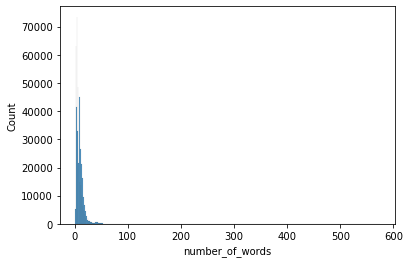

In [6]:
ax = sns.histplot(data=prepared_data, x='number_of_words', binwidth=1)

From the above we can see that most of the data has many fewer than 100 words. Let's look at things with fewer than 128 words. Certainly the vast majority of records have fewer than this amount of words.

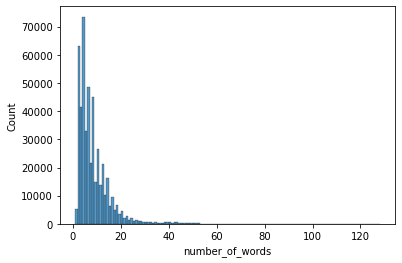

In [7]:
ax2 = sns.histplot(data=(prepared_data
                         .query('number_of_words<=128')), 
                   x='number_of_words', 
                   binwidth=1) 

The power of thigns like sentence transformers is in the ability of them to embed context when examining sequence data in their trained domain.

As a result, very short sequences may be a limited training value as these will contain limited sequence information. 

In [8]:
prepared_data.query('number_of_words<=3')['number_of_words'].value_counts()/len(prepared_data)

2    0.126674
3    0.083111
1    0.010730
Name: number_of_words, dtype: float64

In [9]:
(prepared_data.query('number_of_words<=3')['number_of_words'].value_counts()/len(prepared_data)).sum()

0.22051584205403754

Around 1% of descriptions contain only 1 word. While this is not ideal, it is probably not likely to significantly alter the performance of the model. Sequences which contain 3 or fewer words make up 22% of the training set. This may need to be addressed if the model fails to perform in production.

It is likely acceptable to trim sequences of more than 128 words. It is likely not a problem to trim the sequences to 64 words without a significant loss in information

In [10]:
np.median(prepared_data['number_of_words'])

6.0

In [11]:
prepared_data['number_of_words'].mode()

0    4
dtype: int64

In [12]:
(prepared_data['number_of_words']>128).sum()/len(prepared_data['number_of_words'])

0.00043435944048069114

# Class Imbalance in Prepared Data

In [55]:
class_count_df = (prepared_data['label_name']
                  .value_counts()
                  .reset_index()
                  .rename(columns = {'index': 'segment',
                                     'label_name': 'segment_count'}))

In [56]:
class_count_df.head()

,segment,segment_count
0,80000000,55478
1,50000000,48764
2,43000000,40913
3,81000000,33755
4,25000000,26388


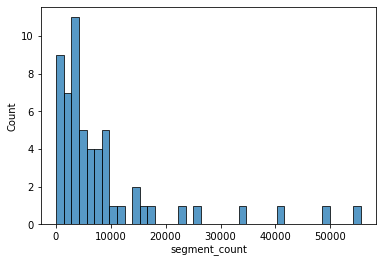

In [57]:
ax3 = sns.histplot(data=(class_count_df), 
                   x='segment_count', 
                   bins=40) 

We can see that the number of segment the majority of classes have fewer than 10000 members.

In [59]:
class_count_df['segment_count'].describe()

count       57.000000
mean      8724.280702
std      11568.188890
min         85.000000
25%       2365.000000
50%       4530.000000
75%       9162.000000
max      55478.000000
Name: segment_count, dtype: float64

The description information for segment_count indicates that the minimum value is 85 members of a class and the maximum is 55478. 

A class imbalance spanning 4 orders of magnitude is too great to be accepted. Class rebalancing in some form will need to be pursued.